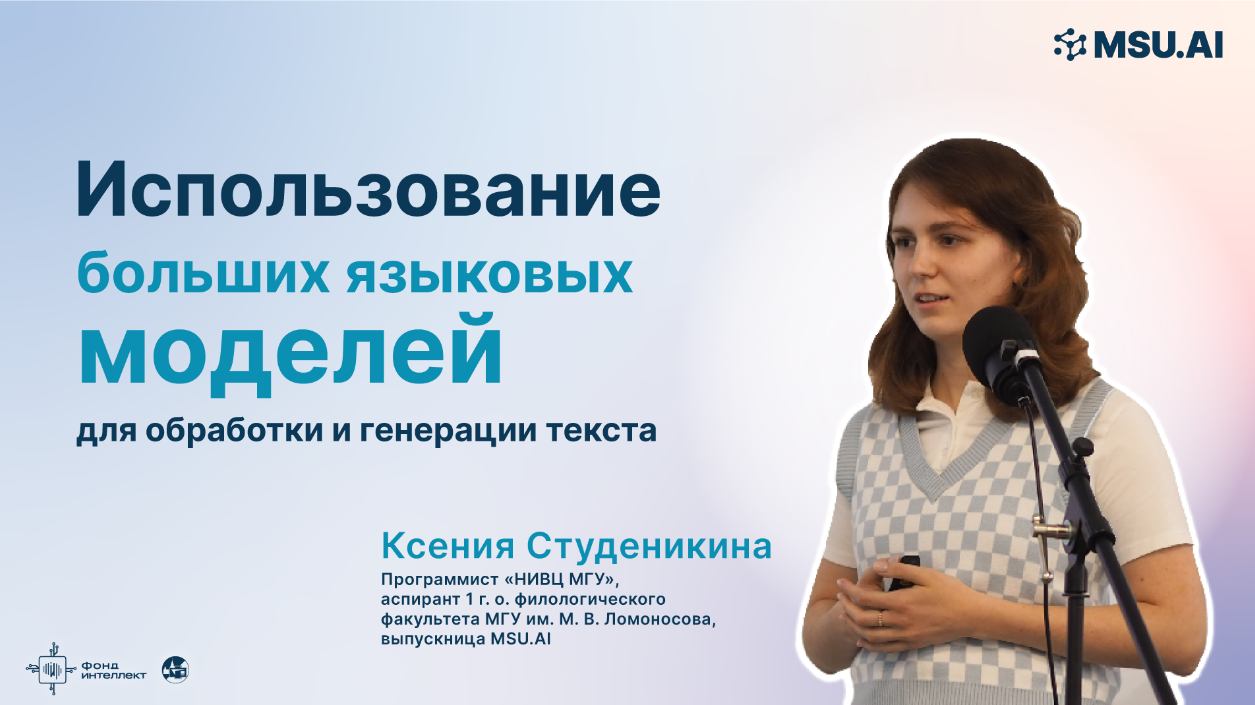

## Что такое языковое моделирование?

Языковая модель оценивает вероятность встретить предложение $S$  — последовательность слов $(w_1,\cdots ,w_n)$. Вероятность предложения можно определить как произведение вероятности каждого слова с учетом предыдущих слов:
$$P(w_1,w_2, \dots, w_n) = p(w_1)p(w_2|w_1)p(w_3|w_1,w_2)\dots p(w_n|w_1,w_2,\dots,w_{n-1})= \prod\limits_{i = 1}^n p(w_i|w_1, \dots, w_{i-1})$$
Для каждого слова последовательности предсказывается вероятность встретить его в тексте при условии, что известно предыдущее слово: $w_2$ при условии $w_1$, $w_3$ при условии $w_1$ и $w_2$, и т.д.

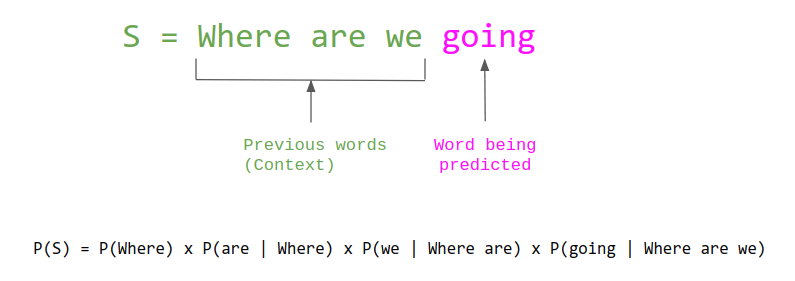

Истинные вероятности предложений неизвестны → можно обучить языковую модель оценивать эти вероятности. Вероятность рассчитывается на основе частоты встречаемости слов в корпусе текстов:
$$p (w_i|w_{i-(n-1)}, \dots, w_{i-1}) = \frac{count(w_{i-(n-1)}, \dots, w_{i-1}, w_{i})}{count(w_{i-(n-1)} \dots, w_{i-1})}$$
Такие языковые модели называются *n-граммными*. Термины *биграммные* и *триграммные* языковые модели обозначают n-граммные модели с $n = 2$ и $n = 3$ соответственно.

Результат: языковая модель способна оценивать вероятность следующего слова последовательности.

💡Где в повседневной жизни вы сталкивались с использованием языковых моделей?


Клавиатура смартфона

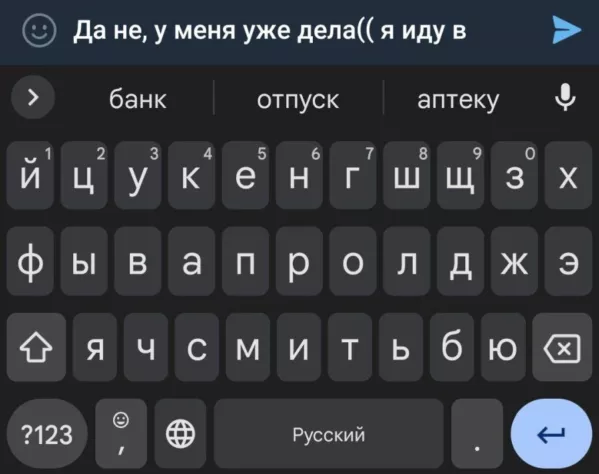

Поисковый запрос

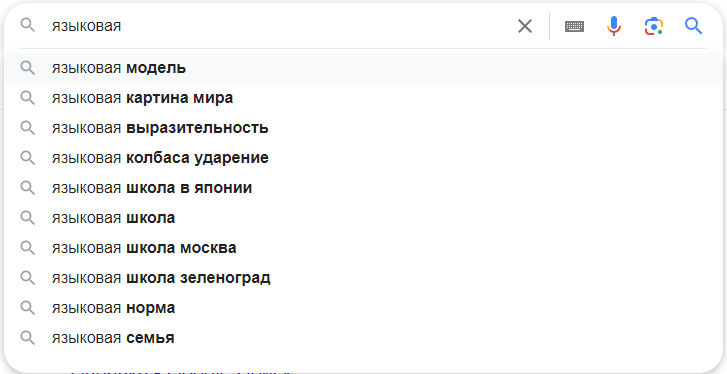

Если модель способна предсказать вероятность следующего слова, то она уже достаточно много знает о языке.

*Я люблю вкусную ...*

На месте пропуска должно стоять неодушевленное существительное женского рода в винительном падеже, которое обозначает нечно съедбное (*еду, колбасу, рыбу* и т.д.).

Языковая модель может применяться для генерации текста: если подать на вход некоторое слово $w_1$, то модель предскажет наиболее вероятное продолжение $w_2$. Затем слова $w_1$ и $w_2$ используются для предсказания следующего слова $w_3$.

💡В чем недостаток n-граммных языковых моделей для генерации текста?

В настоящее время наилучшие результаты достигаются с помощью больших языковых на основе архитектуры Трансформер.

## Архитектура Трансформер

Архитектура была представлена в статье [Attention Is All You Need](https://arxiv.org/abs/1706.03762) для задачи машинного перевода.

Трансформер состоит из блока энкодера и блока декодера.

💡Какие функции выполняют энкодер и декодер?

Блок энкодера состоит из 6 энкодеров, расположенных друг за другом. Блок декодера – это стек декодеров, представленных в том же количестве.

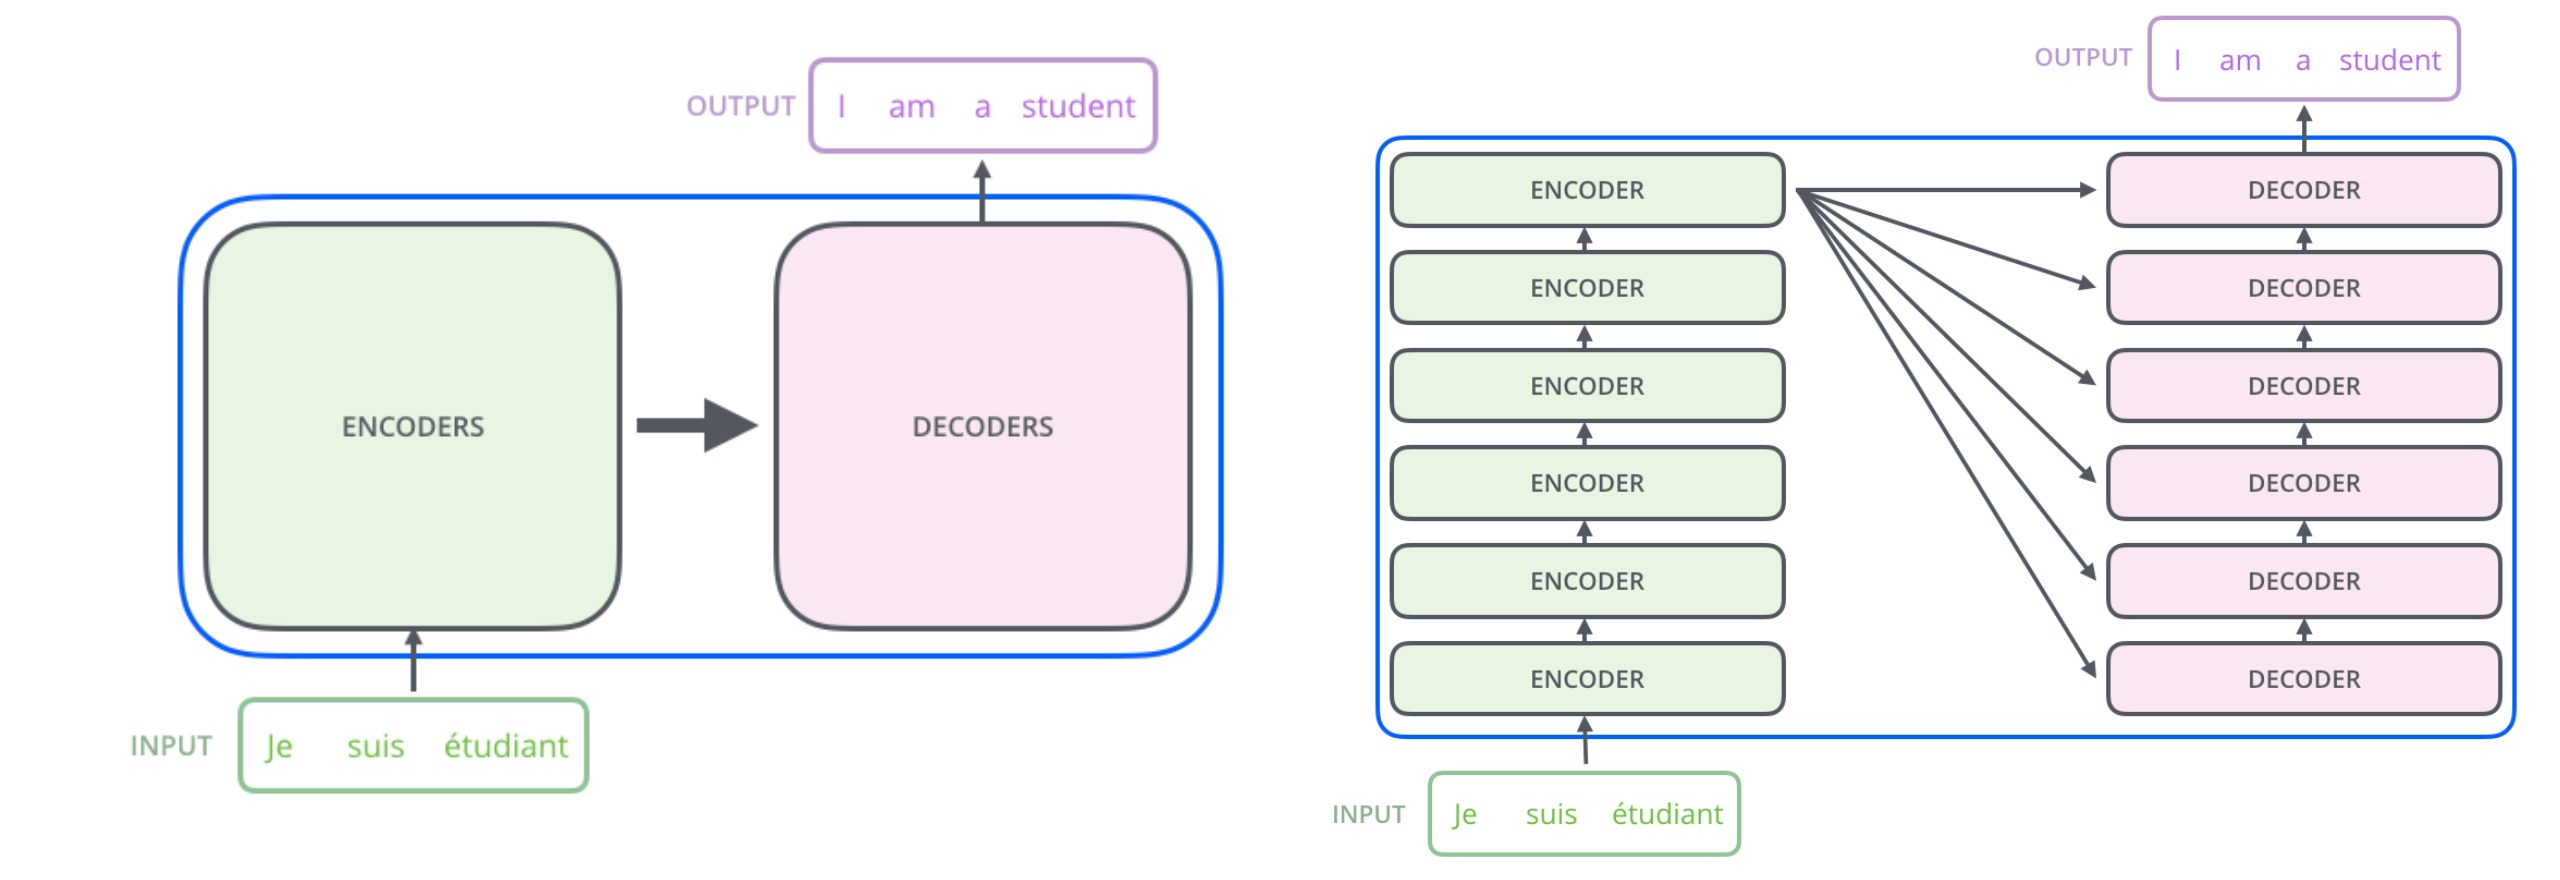

Все энкодеры идентичны по структуре, хотя и имеют разные веса. Каждый можно разделить на два подслоя.
- Входная последовательность, поступающая в энкодер, сначала проходит через слой внутреннего внимания (self-attention), помогающий энкодеру посмотреть на другие слова во входном предложении во время кодирования конкретного слова.
- Выход слоя внутреннего внимания отправляется в нейронную сеть прямого распространения (feed-forward neural network).

Декодер также содержит эти два слоя, но между ними есть слой внимания, который помогает декодеру фокусироваться на релевантных частях исходного предложения.

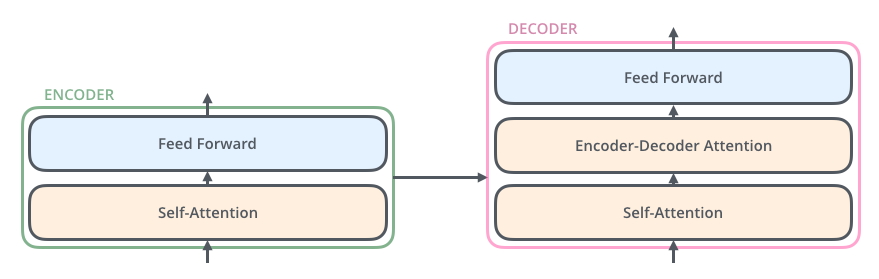

Пусть мы хотим перевести предложение: *The animal didn't cross the street because it was too tired*. Местоимение *it* может относиться к улице (*street*) или к животному (*animal*). Когда модель обрабатывает слово *it*, слой внутреннего внимания помогает понять, что *it* относится к *animal*.

По мере того как модель обрабатывает каждое слово входной последовательности, внутреннее внимание позволяет "взглянуть" на другие слова и лучше закодировать данное слово. Механизм внутреннего внимания – это метод, который Трансформер использует, чтобы смоделировать "понимание" других релевантных слов при обработке конкретного слова.

Во время кодирования *it* в энкодере №5 часть механизма внимания фокусируется на *The animal* и использует фрагмент его представления для кодирования *it*. Подробнее про визуализацию внимания можно посмотреть в [блокноте](https://colab.research.google.com/github/davidarps/2022_course_embeddings_and_transformers/blob/main/Visualizing_Attention_with_BertViz.ipynb).

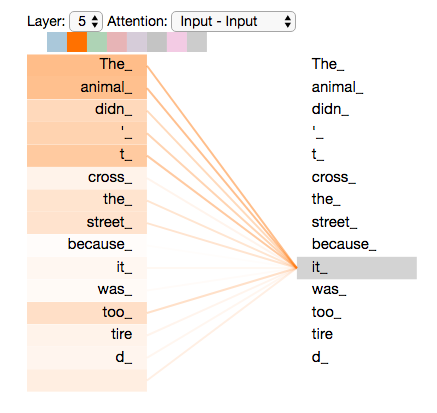

Фактически, декодер выполняет задачу языкового моделирования. Однако генерация происходит не случайным образом, а с учетом векторного представления, полученного из энкодера.

В задаче языкового моделирования мы должны получать распределение вероятностей для следующего элемента при условии текущей последовательности — вектор вероятностей, длина которого равна количеству элементов в словаре. Необходимо пропустить выход декодера для каждого слова через линейный слой и применить функцию активации softmax.

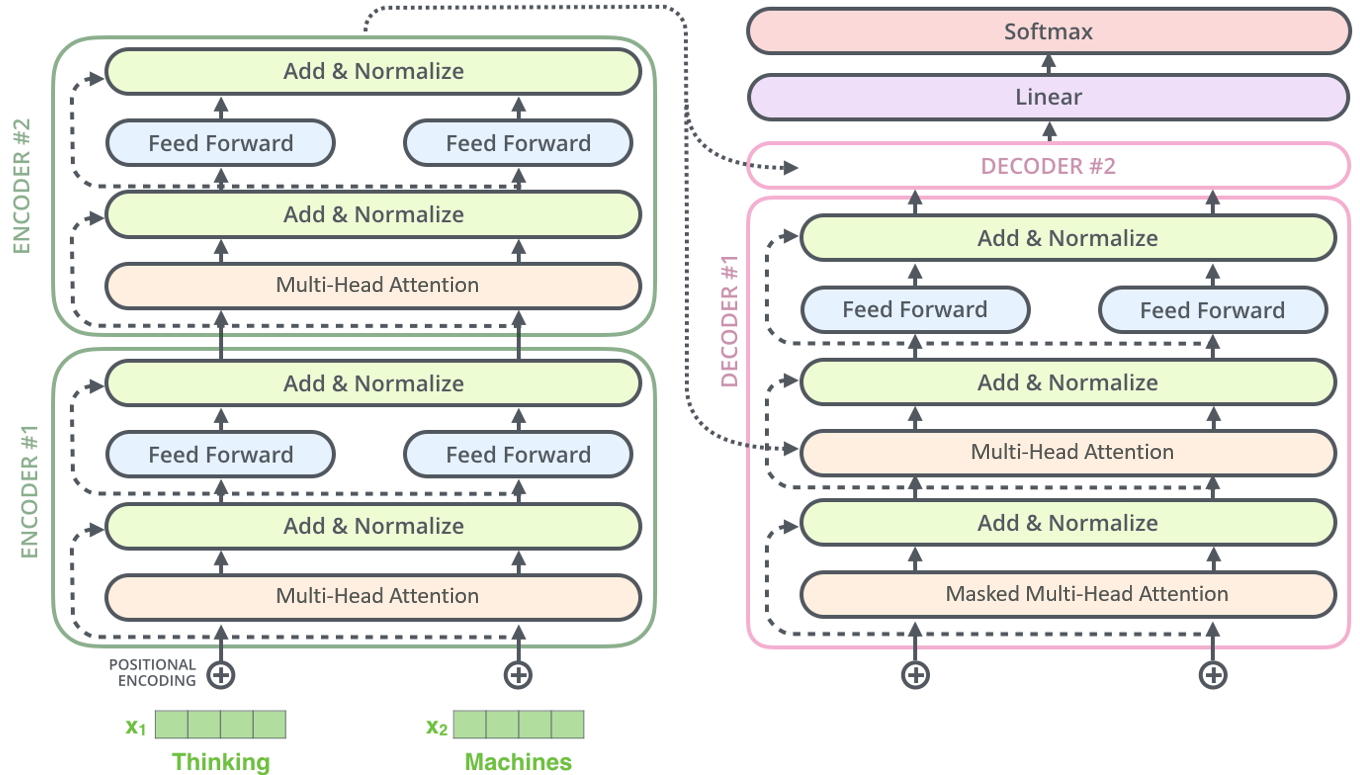

Блоки энкодера и декодера можно использовать по отдельности:
- Модели на основе энкодера — для получения контекстных векторных представлений и применения в задачах классификации, поиска ответа на вопрос (Bidirectional Encoder Representations from Transformers, BERT);
- Модели на основе декодера — для предсказания вероятности следующего слова и генерации текста (Generative pre-trained transformers, GPT).

## Модели на основе энкодера

### Первая языковая модель-энкодер – BERT

Модель BERT была представлена в статье [BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding](https://arxiv.org/abs/1810.04805).

BERT состоит из нескольких последовательно соединенных блоков энкодера трансформера. На вход модель получает последовательность токенов, на выходе отдает векторное представление для каждого токена, обогащенное контекстом. Энкодер содержит механизм внутреннего внимания (Self-Attention), который применяется к каждому токену и позволяет улавливать контекст.

Две конфигурации: 
- базовая (base): 12 слоев, размер скрытого слоя — 768, 110 миллионов весов
- расширенная (large): 24 слоя, размер скрытого слоя — 1024, 340 миллионов весов

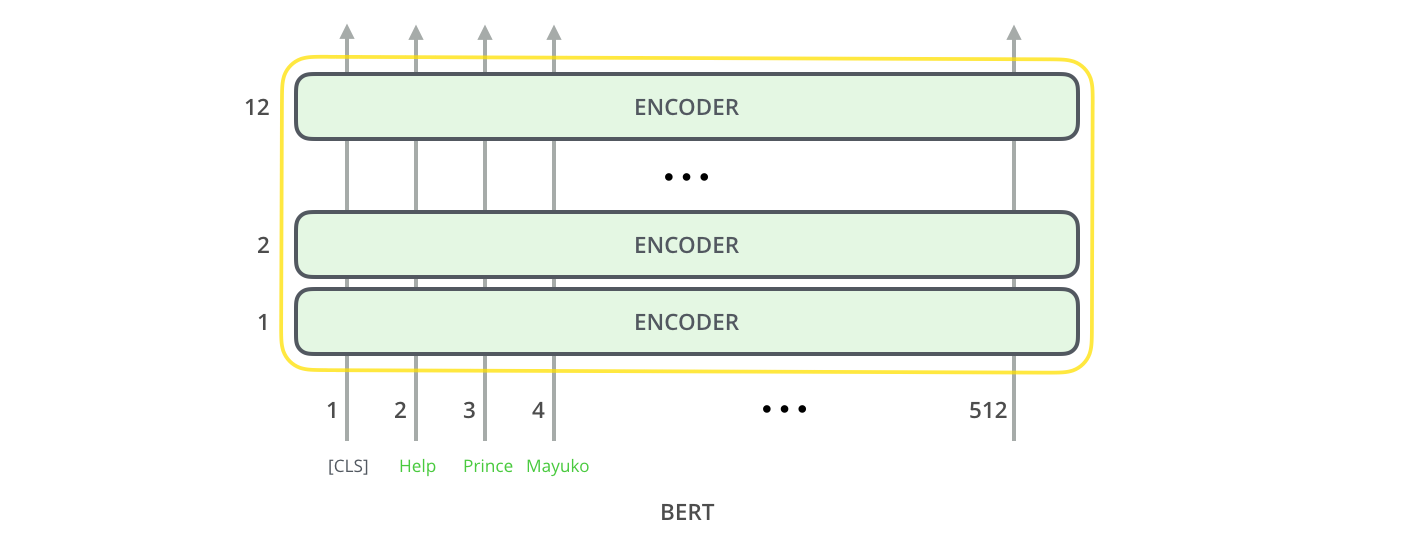

BERT обучается на двух задачах:
- Маскированное языковое моделирование (Masked Language Modeling, MLM)

  - 15% случайно выбранных токенов по всему корпусу маскируется — заменяется на спецтокен [MASK]. Задача модели — предсказать наиболее вероятный токен на месте маски.
  - Обучение на задаче маскированного языкового моделирования позволяет получить контекстуализированные векторы токенов. Предобученные векторы можно использовать в других задачах обработки текста.

- Предсказание следующего предложения (Next Sentence Prediction, NSP)
  - Помимо векторов слов, хотелось бы получать также векторные представления предложений. Для этого попробуем предсказать, следует ли одно предложение за другим. 
  - Предложения разделены спецтокеном [SEP]. За классификацию отвечает спецтокен [CLS]. Он содержит представление обо всем предложении.

Обучение происходит по двум задачам параллельно. Значение функции потерь считается отдельно для маскированного языкового моделирования по токену [MASK] и для предсказания следующего слова по токену [CLS].

### Библиотека Transformers

Библиотека [Transformers](https://huggingface.co/docs/transformers/index) создана сообществом HuggingFace. Она позволяет работать с открытыми трансформерными моделями.

In [1]:
from IPython.display import clear_output


!pip install transformers

clear_output()

В библиотеке реализованы классы для различных архитектур — в том числе, для модели [BERT](https://huggingface.co/docs/transformers/model_doc/bert). Ей соответствуют классы [BertTokenizer](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertTokenizer) и [BertModel](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertModel). 

Также можно использовать [автоматические классы ](https://huggingface.co/docs/transformers/model_doc/auto): [AutoTokenizer](https://huggingface.co/docs/transformers/model_doc/auto#transformers.AutoTokenizer) и [AutoModel](https://huggingface.co/docs/transformers/model_doc/auto#transformers.AutoModel). Это делает очень простой замену модели — достаточно просто поменять идентификатор.

BERT — это общее название архитектуры. С её использованием были обучены модели на различных языках и датасетах. Все модели, которые доступны на HuggingFace, можно посмотреть в разделе [Models](https://huggingface.co/models). Чтобы загрузить модель, нужно указать её идентификатор.

Для загрузки конкретных моделей используется метод `.from_pretrained`.

Загрузим токенизатор для модели [BERT base cased](https://huggingface.co/bert-base-cased) для английского языка.

In [2]:
import transformers
from transformers import AutoTokenizer


transformers.logging.set_verbosity_error()

MODEL_NAME = "bert-base-cased"
bert_tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

Есть два полярных варианта: токенизация на слова и токенизация на символы. В модели BERT используется алгоритм WordPiece для токенизации на подслова. Будем последовательно двигаться от посимвольной токенизации к пословной. Остановимся в тот момент, когда будет достигнут нужный размер словаря. 

Алгоритм позволяет эксплицитно задавать размер словаря. В конце работы словарь будет включать наиболее частотные слова, а более редкие будут представлены подсловами.

Токенизируем английское предложение с помощью метода `.tokenize()`. 

In [3]:
sent = "He remains characteristically confident and optimistic."
tokenized_sent = bert_tokenizer.tokenize(sent)
tokenized_sent

['He',
 'remains',
 'characteristic',
 '##ally',
 'confident',
 'and',
 'optimistic',
 '.']



Если какое-то слово не представлено в словаре целиком, при токенизации оно делится на подслова.

Посмотрим, какие индексы в словаре соответствуют словам, с помощью метода `convert_tokens_to_ids()`.

In [4]:
bert_tokenizer.convert_tokens_to_ids(tokenized_sent)

[1124, 2606, 7987, 2716, 9588, 1105, 24876, 119]

Токенизатор уже содержит индексы для спецсимволов:
- [SEP] — метка конца предложения
- [CLS] — токен для классификации предложения
- [PAD] — токен для выравнивания длин последовательностей

In [5]:
print(bert_tokenizer.sep_token, bert_tokenizer.sep_token_id)
print(bert_tokenizer.cls_token, bert_tokenizer.cls_token_id)
print(bert_tokenizer.pad_token, bert_tokenizer.pad_token_id)

[SEP] 102
[CLS] 101
[PAD] 0


Вся предобработка может быть сделана с помощью метода `encode_plus`. Он возвращает словарь с ключами `input_ids` и `attention_mask`.

In [6]:
encoding = bert_tokenizer.encode_plus(
  sent, # преобразуемый текст
  max_length=20, # максимальная длина
  add_special_tokens=True, # добавить спецтокены [CLS] и [SEP]
  return_token_type_ids=False, # вернуть номер предложения
  padding='max_length', # паддинг по установленной максимальной длине
  return_attention_mask=True, # создать маску для механизма внимания
  return_tensors='pt', # вернуть тензор PyTorch
  truncation=True # обрезать предложения длинее max_length
)
encoding

{'input_ids': tensor([[  101,  1124,  2606,  7987,  2716,  9588,  1105, 24876,   119,   102,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])}

Загрузим саму модель [BERT base cased](https://huggingface.co/bert-base-cased) для английского языка. Можем увидеть ее архитектуру.

In [7]:
from transformers import AutoModel
bert_model = AutoModel.from_pretrained(MODEL_NAME)
bert_model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(28996, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

Попробуем использовать эту модель. Применим её к токенизированному предложению. Модель принимает индексы токенов и маску внимания.

В переменную `hidden_states` записаны скрытые состояние слоя эмбеддингов и всех слоев энкодера (векторы каждого токена в предложении), в переменную `last_hidden_state` — скрытые состояния последнего слоя энкодера модели. Переменная `pooled_output` содержит выход линейного слоя модели — контекстный вектор для токена [CLS].

In [8]:
print(f"Токены:\n{bert_tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])}")
print(f"Индексы токенов:\n{encoding['input_ids'][0]}")
print(f"Маска внимания:\n{encoding['attention_mask']}")

last_hidden_state, pooled_output, hidden_states = bert_model(
  input_ids=encoding['input_ids'],
  attention_mask=encoding['attention_mask'],
  output_hidden_states=True,
  return_dict=False)

print(f'\nВсего скрытых состояний: {len(hidden_states)}')
print(f'Размер скрытых состояний последнего слоя: {last_hidden_state.shape}')
print(f'Размер выхода линейного слоя: {pooled_output.shape}')

Токены:
['[CLS]', 'He', 'remains', 'characteristic', '##ally', 'confident', 'and', 'optimistic', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Индексы токенов:
tensor([  101,  1124,  2606,  7987,  2716,  9588,  1105, 24876,   119,   102,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])
Маска внимания:
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

Всего скрытых состояний: 13
Размер скрытых состояний последнего слоя: torch.Size([1, 20, 768])
Размер выхода линейного слоя: torch.Size([1, 768])


### Дообучение BERT для анализа тональности

#### Загрузка данных

Загрузим данные, которые мы будем использовать для обучения и тестирования модели, — отзывы на приложения в Google Play.


In [9]:
!wget https://edunet.kea.su/datasets/reviews.csv

--2023-06-06 12:29:37--  https://edunet.kea.su/datasets/reviews.csv
Resolving edunet.kea.su (edunet.kea.su)... 89.175.15.242
Connecting to edunet.kea.su (edunet.kea.su)|89.175.15.242|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7170328 (6.8M) [application/octet-stream]
Saving to: ‘reviews.csv’

reviews.csv         100%[===================>]   6.84M  2.02MB/s    in 3.4s    

2023-06-06 12:29:42 (2.02 MB/s) - ‘reviews.csv’ saved [7170328/7170328]



In [10]:
import pandas as pd

df = pd.read_csv("reviews.csv")
df

userName                                          userImage  \
0          Andrew Thomas  https://lh3.googleusercontent.com/a-/AOh14GiHd...   
1           Craig Haines  https://lh3.googleusercontent.com/-hoe0kwSJgPQ...   
2          steven adkins  https://lh3.googleusercontent.com/a-/AOh14GiXw...   
3       Lars Panzerbjørn  https://lh3.googleusercontent.com/a-/AOh14Gg-h...   
4          Scott Prewitt  https://lh3.googleusercontent.com/-K-X1-YsVd6U...   
...                  ...                                                ...   
15741          Tammy Kay  https://lh3.googleusercontent.com/a-/AOh14GhYP...   
15742          Ysm Johan  https://lh3.googleusercontent.com/a-/AOh14Ggmd...   
15743      casey dearden  https://lh3.googleusercontent.com/a-/AOh14Gg2U...   
15744     Jerry G Tamate  https://lh3.googleusercontent.com/a-/AOh14GiTP...   
15745  Ahmed elsalamouni  https://lh3.googleusercontent.com/-9QSxVUhCoDI...   

                                                 content  score  \
0      Update: After getting a response from the deve...      1   
1      Used it for a fair amount of time without any ...      1   
2      Your app sucks now!!!!! Used to be good but no...      1   
3      It seems OK, but very basic. Recurring tasks n...      1   
4      Absolutely worthless. This app runs a prohibit...      1   
...                                                  ...    ...   
15741  I believe that this is by far the best app wit...      5   
15742                       It sometimes crashes a lot!!      5   
15743                         Works well for what I need      5   
15744                                           Love it.      5   
15745  Really amazing and helped me sooo much just i ...      5   

       thumbsUpCount reviewCreatedVersion                   at  \
0                 21             4.17.0.3  2020-04-05 22:25:57   
1                 11             4.17.0.3  2020-04-04 13:40:01   
2                 17             4.17.0.3  2020-04-01 16:18:13   
3                192             4.17.0.2  2020-03-12 08:17:34   
4                 42             4.17.0.2  2020-03-14 17:41:01   
...              ...                  ...                  ...   
15741              0                  NaN  2018-02-17 06:09:03   
15742              0                4.3.7  2018-02-15 10:45:22   
15743              0                4.3.7  2018-02-09 18:40:37   
15744              0                  NaN  2018-02-06 12:36:17   
15745              6                4.3.7  2018-02-04 22:57:09   

                                            replyContent            repliedAt  \
0      According to our TOS, and the term you have ag...  2020-04-05 15:10:24   
1      It sounds like you logged in with a different ...  2020-04-05 15:11:35   
2      This sounds odd! We are not aware of any issue...  2020-04-02 16:05:56   
3      We do offer this option as part of the Advance...  2020-03-15 06:20:13   
4      We're sorry you feel this way! 90% of the app ...  2020-03-15 23:45:51   
...                                                  ...                  ...   
15741                                                NaN                  NaN   
15742                                                NaN                  NaN   
15743                                                NaN                  NaN   
15744                                                NaN                  NaN   
15745                                                NaN                  NaN   

           sortOrder              appId  
0      most_relevant          com.anydo  
1      most_relevant          com.anydo  
2      most_relevant          com.anydo  
3      most_relevant          com.anydo  
4      most_relevant          com.anydo  
...              ...                ...  
15741         newest  com.appxy.planner  
15742         newest  com.appxy.planner  
15743         newest  com.appxy.planner  
15744         newest  com.appxy.planner  
15745         newest  com.appxy.pl

Нас будут интересовать столбец "content", содержащий отзыв, и столбец "score" с оценкой (классом).

Посмотрим на распределение классов в выборке

3    0.320208
5    0.184174
4    0.176299
1    0.162962
2    0.156357
Name: score, dtype: float64


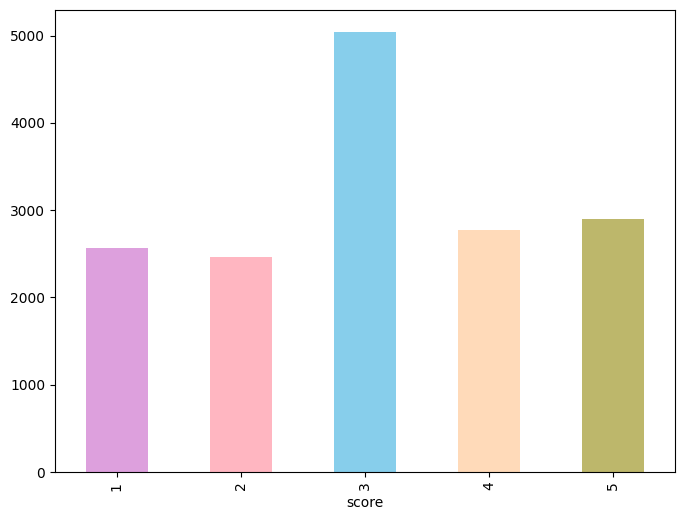

In [11]:
import matplotlib.pyplot as plt

print(df['score'].value_counts(normalize=True))

fig = plt.figure(figsize=(8,6))
df.groupby('score').content.count().plot.bar(ylim=0, color=['plum', 'lightpink', 'skyblue', 'peachpuff', 'darkkhaki'])
plt.show()

Можем заметить, что данные несбалансированы: отзывов с оценкой "3" больше всего, с остальными оценками значительно меньше.

Объединим классы "1" и "2", а также классы "4" и "5". Теперь отзывы разделены на 3 класса: негативные (1,2), нейтральные (3) и позитивные (4,5). В таком виде классы почти сбалансированы.

2    0.360473
1    0.320208
0    0.319319
Name: sentiment, dtype: float64


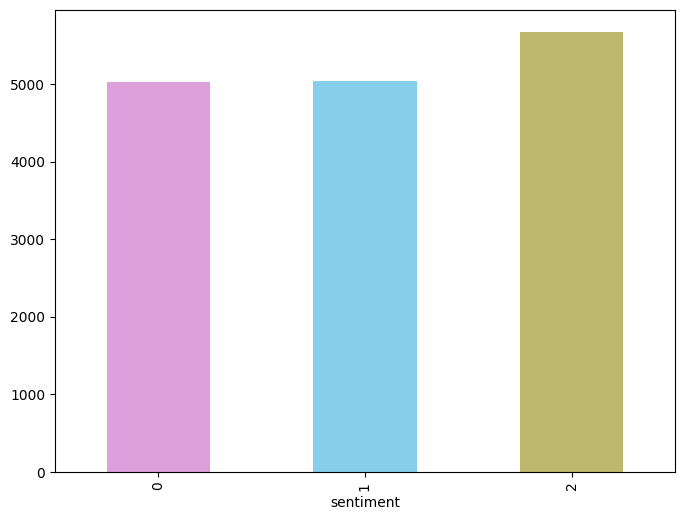

In [12]:
def to_sentiment(rating):
  rating = int(rating)
  if rating <= 2:
    return 0
  elif rating == 3:
    return 1
  else: 
    return 2

df['sentiment'] = df.score.apply(to_sentiment)

print(df['sentiment'].value_counts(normalize=True))

fig = plt.figure(figsize=(8,6))
df.groupby('sentiment').content.count().plot.bar(ylim=0, color=['plum', 'skyblue', 'darkkhaki'])
plt.show()

#### Предобработка данных

Проанализируем, какая длина отзывов встречается в данных чаще. Отберем отзывы длины менее 512 токенов, поскольку это максимальная длина последовательности для модели BERT.

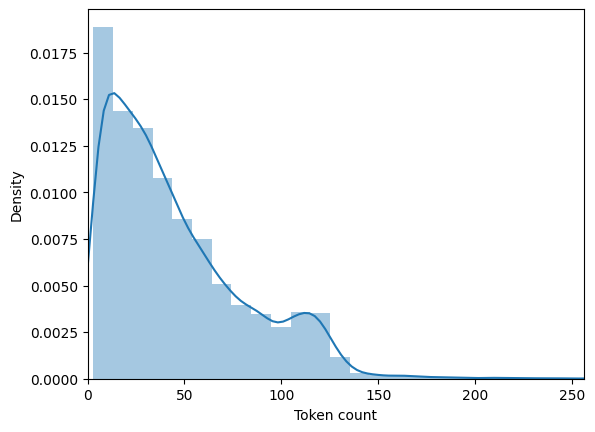

In [13]:
import warnings
import seaborn as sns


warnings.filterwarnings('ignore')

token_lens = []
for txt in df.content:
  tokens = bert_tokenizer.encode(txt, truncation=True)
  token_lens.append(len(tokens))
  
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count');

Установим максимальную длину последовательности равной 150.

In [14]:
MAX_LEN = 150

Теперь создадим датасет PyTorch, который понадобится для обучения и тестирования модели.

In [15]:
from torch.utils.data import Dataset

class GPReviewDataset(Dataset):

  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews # тексты отзывов
    self.targets = targets # метки классов
    self.tokenizer = tokenizer # токенизатор
    self.max_len = max_len # максимальная длина последовательности
  
  def __len__(self):
    return len(self.reviews) # размер датасета
  
  def __getitem__(self, item): # сопоставляем тексты отзывов и метки классов по индексу
    review = str(self.reviews[item])
    target = self.targets[item]

    # предобработка отзыва, преобразование в словарь 
    encoding = self.tokenizer.encode_plus(
      review, # преобразуемый текст
      max_length=self.max_len, # максимальная длина
      add_special_tokens=True, # добавление спецтокенов [CLS] и [SEP]
      return_token_type_ids=False, # номер предложения
      padding='max_length', # паддинг по установленной максимальной длине
      return_attention_mask=True, # маска для механизма внимания
      return_tensors='pt', # тензор PyTorch
      truncation=True # усечение длины по max_length
    )
    
  # Метод возвращает словарь: текст отзыва, индексы токенов, маску внимания, метку класса.
    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

Разделим данные на обучающую, валидационную и тестовую выборки. 90% всех данных отберем для обучения, оставшиеся 10% поделим пополам для валидации и тестирования.

Будем использовать графический процессор для вычислений.

In [16]:
import torch
from sklearn.model_selection import train_test_split

RANDOM_SEED = 1
torch.manual_seed(RANDOM_SEED)
df_train, df_test = train_test_split(df, test_size=0.1, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)
print(f'Обучающая выборка: {df_train.shape}')
print(f'Валидационная выборка: {df_val.shape}')
print(f'Тестовая выборка: { df_test.shape}')

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

Обучающая выборка: (14171, 12)
Валидационная выборка: (787, 12)
Тестовая выборка: (788, 12)


device(type='cuda', index=0)

Создадим итераторы по данным для разделения на батчи.

In [17]:
from torch.utils.data import DataLoader

def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    reviews=df.content.to_numpy(),
    targets=df.sentiment.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=1
  )

BATCH_SIZE = 16

train_data_loader = create_data_loader(df_train, bert_tokenizer, MAX_LEN, BATCH_SIZE) # данные для дообучения модели
val_data_loader = create_data_loader(df_val, bert_tokenizer, MAX_LEN, BATCH_SIZE) # данные для валидации модели при обучении
test_data_loader = create_data_loader(df_test, bert_tokenizer, MAX_LEN, BATCH_SIZE) # данные для тестирования модели

Посмотрим на пример одного батча из итератора `train_data_loader`.



In [18]:
data = next(iter(train_data_loader))
print(f'Батч:\n{data.keys()}\n')
print(f"Предложения в батче:\n{data['review_text']}\n")
print(f"Индексы токенов:\n{data['input_ids'].shape}\nbatch size x max len\n")
print(f"Маски внимания:\n{data['attention_mask'].shape}\nbatch size x max len\n")
print(f"Метки классов:\n{data['targets']}")
print(data['targets'].shape)

Батч:
dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

Предложения в батче:
["I had a problem with upgrading to Premium. They were quick with their response and fixed the problem right away. It's a good app for those familiar with the Franklin Covey system, and syncs well across devices.", 'Same issue as Don Smith who wrote a review on 10/10/19. Will consider this app but the lack of slide visuals and character visuals makes the app in-op. Current phone is the Google pixel 4xl......perhaps I misspoke in regards to the reply. My issue is not with the visuals but the lack of visuals. Everything is blank for me so literally can not see half of the content.', "I actually really love this app. I used it to create some serious personal progress. I purchased the full app but when I bought a new phone, it wouldn't let me sign out of my old device and into my new device. I emailed support about it...crickets. Never heard from them. If they can put together a decent support 

#### Создание модели для классификации

Создадим класс `SentimentClassifier` на основе модели BERT.


In [19]:
from torch import nn

class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super().__init__()
    self.bert = AutoModel.from_pretrained(MODEL_NAME)
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask,
      return_dict=False)
    output = self.drop(pooled_output)
    return self.out(output)

In [20]:
n_classes = len(set(df['sentiment']))
model = SentimentClassifier(n_classes)
model = model.to(device)
model

SentimentClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwi

Перенесем на видеокарту один из батчей для примера и применим модель к данным.

In [21]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(f'Индексы токенов:\n{input_ids.shape}\nbatch size x seq length')
print(f'Маска внимания:\n{attention_mask.shape}\nbatch size x seq length')

output = model(input_ids, attention_mask)
print(f'\nВыход модели:\n{output}')
print(f'Размер:\n{output.shape}\nbatch size x num classes')

Индексы токенов:
torch.Size([16, 150])
batch size x seq length
Маска внимания:
torch.Size([16, 150])
batch size x seq length

Выход модели:
tensor([[ 0.0852, -1.1836, -0.6241],
        [ 0.0972, -0.7453, -0.1306],
        [ 0.3748, -0.4685, -0.8313],
        [-0.2136, -0.3078, -0.5334],
        [ 0.2122, -0.3207,  0.1411],
        [ 0.5654, -0.2839, -0.3997],
        [ 0.8044, -0.4905, -0.0335],
        [ 0.6584, -1.1857,  0.1070],
        [-0.4673, -1.0209,  0.1327],
        [ 0.3679, -0.7982, -0.3244],
        [ 0.3435, -0.7283, -0.4767],
        [ 0.5934, -0.5851,  0.1328],
        [-0.1187, -0.2820, -0.6333],
        [-0.0617, -0.4425, -0.7622],
        [ 0.2453, -0.6480, -0.3873],
        [-0.1577, -0.6630, -0.4027]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
Размер:
torch.Size([16, 3])
batch size x num classes


#### Обучение и валидация

Для дообучения модели будем использовать оптимизатор [AdamW](https://huggingface.co/transformers/main_classes/optimizer_schedules.html#adamw) из библиотеки Transformers. 

Авторы модели BERT рекомендуют использовать следующие параметры для дообучения модели:
- Размер батча: 16, 32
- Скорость обучения (с оптимизатором Adam): 5e-5, 3e-5, 2e-5
- Количество эпох: 2, 3, 4

Дообучение может происходить двумя способами:
- меняются веса на всех слоях (`requires_grad=True`);
- часть весов замораживается (`requires_grad=False`), для оставшихся слоев веса меняются (`requires_grad=True`).

По умолчанию для всех весов `requires_grad=True`. Чтобы заморозить веса, нужно установить параметр `requires_grad=False`. Заморозим веса для первых 5 слоев энкодера.

In [22]:
print(f'До заморозки:\n {list(model.bert.encoder.layer[4].parameters())[0]}')

for layer_id in range(5):
  for param in list(model.bert.encoder.layer[layer_id].parameters()):
    param.requires_grad = False

print(f'\nПосле заморозки:\n {list(model.bert.encoder.layer[4].parameters())[0]}')

До заморозки:
 Parameter containing:
tensor([[-0.0364,  0.0123, -0.0401,  ..., -0.0093,  0.0494,  0.0578],
        [ 0.0379, -0.0344, -0.0024,  ..., -0.0349,  0.0399,  0.0477],
        [-0.0212, -0.1096, -0.0186,  ..., -0.0002,  0.0115,  0.1223],
        ...,
        [ 0.0358,  0.0549, -0.0339,  ..., -0.0911, -0.0032,  0.0353],
        [-0.0011, -0.0193, -0.0354,  ...,  0.0179,  0.0108,  0.0361],
        [-0.0437, -0.0433,  0.0228,  ..., -0.0385,  0.0228, -0.0481]],
       device='cuda:0', requires_grad=True)

После заморозки:
 Parameter containing:
tensor([[-0.0364,  0.0123, -0.0401,  ..., -0.0093,  0.0494,  0.0578],
        [ 0.0379, -0.0344, -0.0024,  ..., -0.0349,  0.0399,  0.0477],
        [-0.0212, -0.1096, -0.0186,  ..., -0.0002,  0.0115,  0.1223],
        ...,
        [ 0.0358,  0.0549, -0.0339,  ..., -0.0911, -0.0032,  0.0353],
        [-0.0011, -0.0193, -0.0354,  ...,  0.0179,  0.0108,  0.0361],
        [-0.0437, -0.0433,  0.0228,  ..., -0.0385,  0.0228, -0.0481]],
       dev

Зададим количество эпох и скорость обучения. Будем использовать планировщик (`scheduler`), он регулирует скорость обучения: первые несколько шагов (`num_warmup_steps`) она может увеличиваться, а потом уменьшается. Также определим функцию потерь.

In [23]:
EPOCHS = 2

from transformers import AdamW, get_linear_schedule_with_warmup
# Обучение всех слоев
#optimizer = AdamW(model.parameters(), lr=2e-5) # обучение всех слоев
# Для обучения только незамороженных слоев нужно установить фильтр
optimizer = AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=2e-5)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

Реализуем функцию для одной эпохи обучения.

In [24]:
import numpy as np 

def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train() # переводим модель в состояние обучения

  losses = [] # значения функцим потерь
  correct_predictions = 0 # значения accuracy
  
  for d in data_loader: # итерация по батчам
    input_ids = d["input_ids"].to(device) # индексы токенов
    attention_mask = d["attention_mask"].to(device) # маски внимания
    targets = d["targets"].to(device) # метки классов

    outputs = model( # применяем модель
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    preds = torch.argmax(outputs, dim=1) # позиция максимального значения
    loss = loss_fn(outputs, targets) # подсчет функции потерь

    correct_predictions += torch.sum(preds == targets) # количество совпадений
    losses.append(loss.item())

    loss.backward() # подсчет градиента
    optimizer.step() # обновление весов
    scheduler.step() # изменение скорости обучения
    optimizer.zero_grad() # обнуление градиентов

  return correct_predictions / n_examples, np.mean(losses) # accuracy, среднее значение ошибки

Также реализуем функцию для валидации.

In [25]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval() # переводим модель в состояние валидации

  losses = [] # значения функцим потерь
  correct_predictions = 0 # значения accuracy

  with torch.no_grad(): # грандиент не считается
    for d in data_loader: # итерация по батчам
      input_ids = d["input_ids"].to(device) # индексы токенов
      attention_mask = d["attention_mask"].to(device) # маски внимания
      targets = d["targets"].to(device) # метки классов

      outputs = model( # применяем модель
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      preds = torch.argmax(outputs, dim=1) # позиция максимального значения
      loss = loss_fn(outputs, targets) # подсчет функции потерь

      correct_predictions += torch.sum(preds == targets) # количество совпадений
      losses.append(loss.item())

  return correct_predictions / n_examples, np.mean(losses) # accuracy, среднее значение ошибки

Используя эти две функции, реализуем процедуру дообучения модели.

In [26]:
%%time

# будем записывать значение ошибки и accuracy при обучении и валидации
from collections import defaultdict
history = defaultdict(list) 

for epoch in range(EPOCHS): # итерация по эпохам

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch( # обучение
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model( # валидация
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(df_val)
  )

  print(f'Val loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

Epoch 1/2
----------
Train loss 0.751200722215138 accuracy 0.6514008045196533
Val loss 0.605998694896698 accuracy 0.7407877445220947

Epoch 2/2
----------
Train loss 0.5532646299114884 accuracy 0.7662127017974854
Val loss 0.5507817023992538 accuracy 0.7598474621772766

CPU times: user 8min 37s, sys: 1min 45s, total: 10min 22s
Wall time: 10min 31s


Можем сравнить точность (accuracy) на обучающей и валидационной выборке.

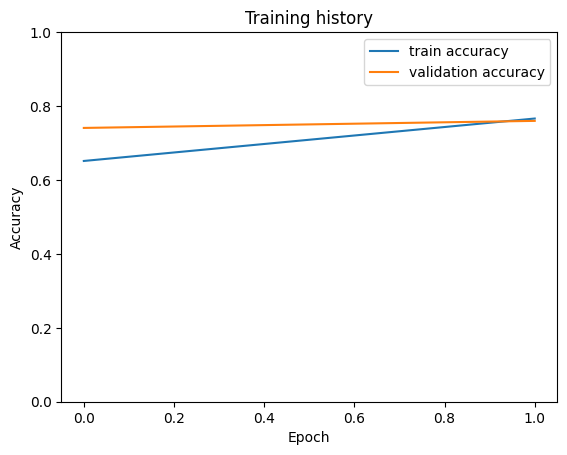

In [27]:
history['train_acc'] = [score.to('cpu') for score in  history['train_acc']]
history['val_acc'] = [score.to('cpu') for score in  history['val_acc']]

plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')

plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

#### Тестирование и предсказание на произвольных текстах

Подсчитаем точность (accuracy) модели на тестовой выборке.

In [28]:
test_acc, _ = eval_model( # тестирование
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

0.7550761103630066

Accuracy на тестовых данных и на валидационной выборке дают близкие значения. Из этого можно сделать вывод, что получившаяся модель обладает хорошей обобщающей способностью.

Также можем отобразить матрицу ошибок для тестовых данных.

In [29]:
def get_predictions(model, data_loader):
  model = model.eval()

  predictions = [] # предсказанные метки
  real_values = [] # правильные метки

  with torch.no_grad(): # грандиент не считается
    for d in data_loader: # итерация по батчам
      input_ids = d["input_ids"].to(device) # индексы токенов
      attention_mask = d["attention_mask"].to(device) # маски внимания
      targets = d["targets"].to(device) # метки классов

      outputs = model( # применяем модель
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      preds = torch.argmax(outputs, dim=1) # позиция максимального значения

      predictions.extend(preds)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  real_values = torch.stack(real_values).cpu()

  return predictions, real_values

y_pred, y_test = get_predictions(model, test_data_loader)

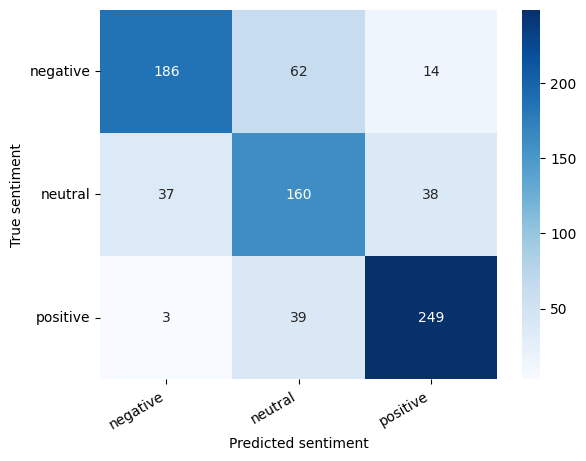

In [30]:
from sklearn.metrics import confusion_matrix
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');
  
class_names = ['negative', 'neutral', 'positive']
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

💡 Какие отзывы модели сложнее всего классифицировать?

Теперь нам осталось научиться использовать нашу модель для предсказания тональности любого текста.

In [31]:
review_text = "I love completing my todos! Best app ever!!!"

Для использования нашей модели нам следует токенизировать текст соответствующим образом.

In [32]:
encoded_review = bert_tokenizer.encode_plus(
  review_text,
  max_length=MAX_LEN,
  add_special_tokens=True,
  return_token_type_ids=False,
  padding='max_length',
  return_attention_mask=True,
  return_tensors='pt',
  truncation=True
)

Теперь получим предсказания нашей модели.

In [33]:
input_ids = encoded_review['input_ids'].to(device)
attention_mask = encoded_review['attention_mask'].to(device)

output = model(input_ids, attention_mask)
prediction = torch.argmax(output, dim=1)

print(f'Review text: {review_text}')
print(f'Sentiment  : {class_names[prediction]}')

Review text: I love completing my todos! Best app ever!!!
Sentiment  : positive


### Другие модели-энкодеры и их сравнение

После появления модели BERT стали появляться другие модели на основе энкодера трансформера.

Модель RoBERTa была представлена статье [RoBERTa: A Robustly Optimized BERT Pretraining Approach](https://arxiv.org/abs/1907.11692). Является улучшенной версией модели BERT за счет более тщательного подбора гиперпараметров.
- больший объем обучающих данных (в 10 раз больше — от 16 Гб к 160 Гб);
- увеличен размер батча (от 256 к 8 000) и размер словаря (от 30 000 к 50 000);
- динамическое маскирование: для каждого предложения используется 10 разных способов маскирования, через каждые 4 прохода по последовательности меняется позиция токена, который заменяется на маску;
- обучается только для маскированного языкового моделирования, предсказание следующего предложения исключается.

Модель ALBERT описывается в статье [ALBERT: A Lite BERT for Self-supervised Learning of Language Representations](https://arxiv.org/abs/1909.11942). Сокращает количество параметров по сравнению с моделью BERT без снижения качества. 
- факторизованная параметризация эмбеддинга

Для модели BERT E = H (E — размер эмбеддингов, H — размер скрытого слоя). Слой эмбеддингов имеет размер V x E (V — размер словаря). При увеличении размера скрытого слоя  увеличивается размер слоя эмбеддингов. Для BERTbase E = H = 768, для BERTlarge E = H = 1024

Чтобы размер скрытого слоя и размерность эмбеддинга были разными, после слоя эмбеддингов (V x E) добавляется полносвязный слой (E x H). Позволяет увеличить размер скрытого слоя, не меняя фактического размера эмбеддинга. Для модели ALBERT E = 128, H = 4096.
 - обмен параметрами между слоями

Архитектуры сетей на основе Трансформера полагаются на независимость слоев. Однако было замечено, что нейросеть выучивается выполнять схожие операции на разных слоях. Эта возможная избыточность устраняется в ALBERT с помощью обмена параметрами между слоями множественного внимания и полносвязными слоями.

- определение порядка предложений

Вместо предсказания следующего предложения используется новая задача: определение порядка предложений (Sentence Order Prediction, SOP).  Положительные примеры — два последовательных предложения, отрицательные примеры — те же, но с их измененным порядком.

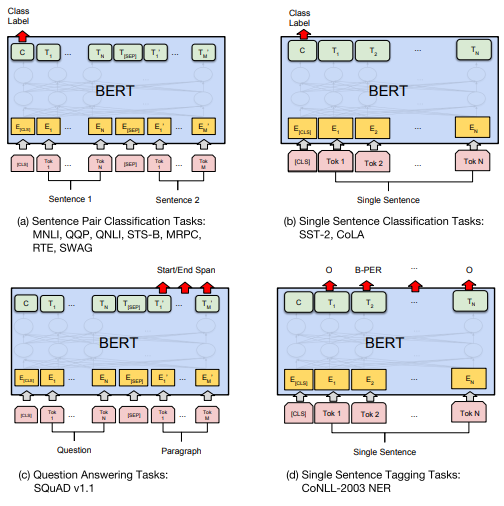

Как же сравнивать качество работы моделей?

Модели на основе энкодера используются для того, чтобы получать контекстуализированные векторные представления слов и предложений. Далее предобученные модели применяются для решения различных задач:

- классификация пары предложений
  - [Multi-Genre Natural Language Inference (MultiNLI)](https://cims.nyu.edu/~sbowman/multinli/) — определение логической связи между текстами (для двух утверждений A и B выяснить, следует ли B из A)
  - [Microsoft Research Paraphrase Corpus (MRPC)](https://www.microsoft.com/en-us/download/details.aspx?id=52398) — определить, являются ли предложения парафразами (выражают одинаковый смысл)
- классификация одного предложения
  - [Corpus of Linguistic Acceptability (CoLA)](https://nyu-mll.github.io/CoLA/) — бинарная классификация предложений по приемлемости (приемлемые, неприемлемые)
  - [Stanford Sentiment Treebank (SST)](https://nlp.stanford.edu/sentiment/index.html) — бинарная классификация по тональности (позитивные, негативные)
- поиск ответа на вопрос
  - [Stanford Question Answering Dataset (SQuAD)](https://rajpurkar.github.io/SQuAD-explorer/) — выделить в тексте подпоследовательность, которая является ответом на заданный вопрос
- теггирование последовательности
  - [CoNLL-2003 ](https://aclanthology.org/W03-0419.pdf) — распознавание именованных сущностей (имен людей, названий организаций, топонимов и т.п.)

Наборы для тестирования моделей представлены в бенчмарках [GLUE](https://gluebenchmark.com/) и [SuperGLUE](https://super.gluebenchmark.com/) для английского языка. Для оценки русскоязычных моделей существует бенчмарк [Russian SuperGLUE](https://russiansuperglue.com/).

## Модели на основе декодера

### Четыре поколения GPT

На основе декодера была создана модель GPT — Generative Pretrained Transformer. Модель GPT была обучена на задаче языкового моделирования, то есть для предсказания (определения вероятности) следующего слова в тексте.

- GPT-1: [Improving Language Understanding by Generative Pre-Training](https://cdn.openai.com/research-covers/language-unsupervised/language_understanding_paper.pdf)

Первая версия этой модели состояла из 12 слоёв и была обучена на 7000 книг. Как языковая модель она работала не очень хорошо, но при дообучении на отдельных задачах показывала высокое качество и SOTA результаты. Максимальный размер контекста у GPT-1 — 512 токенов.

- GPT-2: [Language Models are Unsupervised Multitask Learners](https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf)

SOTA результаты GPT-1 держались недолго, так как появился BERT. Новая GPT-2 содержала 48 слоёв и 1.5 миллиарда параметров. Размер обучающих данных значительно увеличился: к книгам добавили 8 миллионов сайтов, суммарно получилось 40 Гб текста. GPT-2 научилась писать длинные связные тексты. Максимальный размер контекста у GPT-2 — 1024 токенов.

- GPT-3: [Language Models are Few-Shot Learners](https://arxiv.org/pdf/2005.14165.pdf)

GPT-3 имет уже 96 слоев и 175 миллиардов параметров. Она обучена на ещё большем количестве данных — 570 Гб текста. Модель научилась писать рабочий программный код и решать много других NLP-задач без дообучения. Максимальный размер контекста у GPT-3 — 2048 токенов.

- GPT-4: статья отсутствует. 

Нет информации про обучение модели. Работает с контекстом до 8192 токенов. Есть версия, поддерживающая 32 768 токенов (50 страниц). Помимо текстов, умеет работать с изображениями, является мультимодальной.

### Токенизация и генерация текста

Посмотрим на работу модели ruGPT-3 для русского языка. Она доступна в трех вариантах:
- small: [ai-forever/rugpt3small_based_on_gpt2](https://huggingface.co/ai-forever/rugpt3small_based_on_gpt2)
- medium: [ai-forever/rugpt3medium_based_on_gpt2](https://huggingface.co/ai-forever/rugpt3medium_based_on_gpt2)
- large: [ai-forever/rugpt3large_based_on_gpt2](https://huggingface.co/ai-forever/rugpt3large_based_on_gpt2)

Для загрузки токенизатора потребуется класс AutoTokenizer, для загрузки модели — класс AutoModelForCausalLM.

In [34]:
from transformers import AutoModelForCausalLM

MODEL_NAME = "ai-forever/rugpt3large_based_on_gpt2"
gpt_tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
gpt_model = AutoModelForCausalLM.from_pretrained(MODEL_NAME).to(device)

Рассмотрим пример токенизации. Как и BERT-like модели, GPT использует токенизацию на подслова.

In [35]:
text = "Токенизируй меня" # изначальный текст
tokens = gpt_tokenizer.encode(text, add_special_tokens=False) # процесс токенизации с помощью токенизатора ruGPT-3
decoded_tokens = [gpt_tokenizer.decode([token]) for token in tokens] # обратная поэлементая токенизация

print("text:", text)
print("tokens: ", tokens)
print("decoded tokens: ", decoded_tokens)

text: Токенизируй меня
tokens:  [789, 368, 337, 848, 28306, 703]
decoded tokens:  ['Т', 'ок', 'ени', 'зи', 'руй', ' меня']


Языковая модель выдаёт распределение вероятностей следующего токена, эту информацию можно по-разному использовать для генерации текста.

Для наглядности применим все основные методы для продолжения следующего: 'Определение: "Языковая модель" - это'

In [36]:
# Заранее токенизируем текст
text = 'Определение: "Языковая модель" — это'
input_ids = gpt_tokenizer.encode(text, return_tensors="pt").to(device)

Самый простой способ — жадный поиск (greedy search): каждый раз выбирается токен, у которого максимальная вероятность. Это не самый лучший метод, так как в таком случае генерация часто выдаёт повторяющиеся фрагменты.

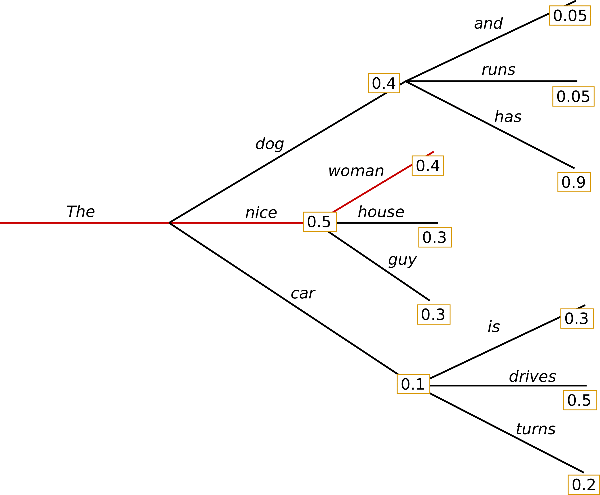

In [37]:
# Пример генерации с помощью жадного поиска
out = gpt_model.generate(input_ids, do_sample=False, max_length=30)

# Декодирование токенов
generated_text = list(map(gpt_tokenizer.decode, out))[0]
print()
print(generated_text)


Определение: "Языковая модель" — это модель, которая описывает, как люди воспринимают и интерпретируют язык. Языковая модель — это



Чуть более сложный и качественный способ — это лучевой поиск (beam search). На каждом шаге выбирается не только один самый вероятный токен, а сразу несколько (за их количество отвечает параметр `num_beams`). Дальше продолжается поиск для каждого из выбранных токенов. Пути генерации разветвляются, что дает несколько вариантов сгенерированного текста. Такая генерация обладает хорошей когерентностью (связностью), но обычно у них не хватает "человечности", они кажутся сухими и скучными. Также это не полностью решает проблему повторяющихся фрагментов генерации.

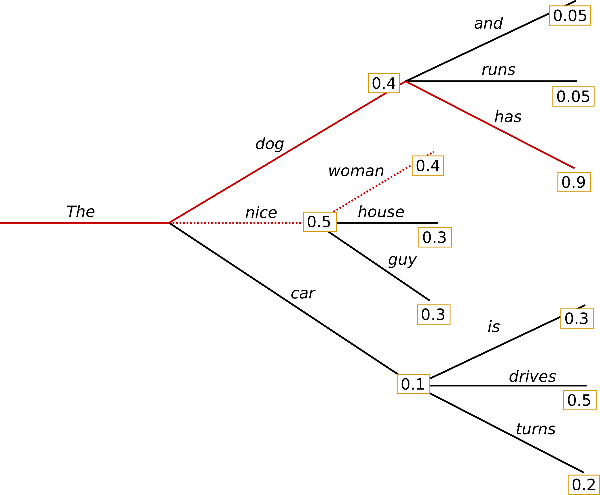

In [38]:
# Пример генерации с помощью лучевого поиска
out = gpt_model.generate(input_ids, do_sample=False, num_beams=5, max_length=40)

# Декодирование токенов
generated_text = list(map(gpt_tokenizer.decode, out))[0]
print()
print(generated_text)


Определение: "Языковая модель" — это совокупность языковых средств, используемых в речи для выражения мыслей, чувств, убеждений и т. д. Языковая модель — это совокупность языковых


Чтобы добавить тексту непредсказуемости, можно использовать вероятностное сэмплирование с температурой. При такой генерации следующий токен выбирается "случайно" с учётом распределения вероятностей. Параметр температуры позволяет контролировать степень рандомности. При нулевой температуре этот метод совпадает с жадным поиском, а при очень большой температуре токены будут выбираться совсем наугад. Обычно хорошо работает температура в диапазоне `0.8 - 2.0`. У этого метода есть и минусы, ведь случайная природа генерации будет изредка приводить к совсем некорректным результатам.

In [39]:
# Пример вероятностного сэмплирования с температурой
out = gpt_model.generate(input_ids, do_sample=True, temperature=1.3, max_length=30)

# Декодирование токенов
generated_text = list(map(gpt_tokenizer.decode, out))[0]
print()
print(generated_text)


Определение: "Языковая модель" — это метод, как определять "языковую модель" объектов действительности в различных процессах восприятия ими внешнего мира и


Для запрета генерации маловероятных токенов вводят `top-k` или `top-p` ограничения. В этом случае генерация тоже происходит случайным образом, но заранее отсекаются все маловероятные токены. В случае `top-k` зануляются все вероятнести кроме `k` самых вероятных . В случае `top-p` остается минимальный набор токенов, чтобы сумма их вероятностей была не больше `p`. Ограничение `top-p` ограничение называют ядерным сэмплированием (nucleus sampling).

In [40]:
# Пример вероятностного сэмплирвоания с ограничением
out = gpt_model.generate(input_ids, 
                     do_sample=True,
                     temperature=1.3,
                     top_k=20,
                     top_p=0.8,
                     max_length=30,
                    )
# Декодирование токенов
generated_text = list(map(gpt_tokenizer.decode, out))[0]
print()
print(generated_text)


Определение: "Языковая модель" — это не просто слова, которые произносят люди, это их культура. Язык отражает культуру общества в целом


### Затравочное программирование

В отличие от BERT-like моделей, для GPT этап дообучения не обязателен. Для того чтобы дописывать текст, модель должна очень хорошо понимать его смысл и иметь знания о реальном мире. Внутренние знания модели можно попытаться использовать, модифицируя левый контекст текста. Поскольку GPT способна генерировать текст, мы можем сформулировать любую NLP-задачу как задачу генерации (продолжения) текста. Это позволяет решать множество задач с минимальным обучением или без него.

Подбор модификаций текста называется "затравочное программирование" (prompt engineering). Суть затравочного программирования в том, чтобы подобрать такие заготовленные примеры и начала для генерации, чтобы дальше модель выдавала ровно то, что надо. Подбирая "затравки" и гиперпараметры генератора (температура, `top-k`, `top-p`), можно добиться хороших ответов за счет только предварительного обучения модели.

Существует два подхода для затравочного программирования:
- zero-shot: сформулировать задачу и передать текст на генерацию;
- few-shot: сформулировать задачу, подать в модель несколько примеров и затем передать текст на генерацию.

In [41]:
# zero-shot learning
text = "С английского на русский 'cat' переводится как '"
input_ids = gpt_tokenizer.encode(text, return_tensors="pt").to(device)
out = gpt_model.generate(input_ids, do_sample=False,max_length=15) 

generated_text = list(map(gpt_tokenizer.decode, out))[0]
print()
print(generated_text)


С английского на русский 'cat' переводится как 'кошка'.



In [42]:
# few-shot learning
text = "С английского на русский 'cat' переводится как 'кошка', 'dog' переводится как 'собака', а 'bird' переводится как '" 
input_ids = gpt_tokenizer.encode(text, return_tensors="pt").to(device)
out = gpt_model.generate(input_ids, do_sample=False, max_length=35) 

generated_text = list(map(gpt_tokenizer.decode, out))[0]
print()
print(generated_text)


С английского на русский 'cat' переводится как 'кошка', 'dog' переводится как 'собака', а 'bird' переводится как 'птица'.


Сделаем рекомендательную систему без обучения: будем подавать информацию о предпочтениях пользователя в виде текста и смотреть, как модель продолжит его. Для генерации специально будем подавать текст с незакрытой кавычкой, чтобы вынудить модель генерировать имена собственные.

In [43]:
# Рекомендация фильмов
text = "Я люблю советские комедии: “Приключения Шурика”, “" 
input_ids = gpt_tokenizer.encode(text, return_tensors="pt").to(device)
out = gpt_model.generate(input_ids, 
                     do_sample=True,
                     temperature=1.0,
                     top_k=10,
                     top_p=0.8,
                     max_length=30,
                    )

generated_text = list(map(gpt_tokenizer.decode, out))[0]
print()
print(generated_text)


Я люблю советские комедии: “Приключения Шурика”, “Кавказская пленница”, “Бриллиантовая рука”, “Операция Ы


In [44]:
# Рекомендация музыки
text = "Тем людям, кому нравится “Сплин”, также понравятся группы “" 
input_ids = gpt_tokenizer.encode(text, return_tensors="pt").to(device)
out = gpt_model.generate(input_ids, 
                     do_sample=True,
                     temperature=1.0,
                     top_k=10,
                     top_p=0.5,
                     max_length=30,
                    )

generated_text = list(map(gpt_tokenizer.decode, out))[0]
print()

print(generated_text)


Тем людям, кому нравится “Сплин”, также понравятся группы “Пилот”, “Пикник”, “Ногу свело”, “К


Таким образом, один из последних быстро развивающихся трендов в NLP — решать множество задач одной общей моделью.

- Предобучение трансформерных моделей на большом объеме неразмеченных данных закладывает широкое понимание языка
- Дообучение под конкретную задачу требует наличия размеченных корпусов гораздо меньшего размера
- При правильных затравках (инструкциях) предобученный модели могут решать задачи, которые они никогда не видели
- Все возможные NLP задачи можно свести к генерации текста: генерация перевода для машинного перевода, генерация метки класса для классификации, генерация исправленной последовательности для исправления опечаток, генерация именованых сущностей для извлечения именованных сущностей. Главное — правильно сформулировать затравку или инструкцию.


### Дообучение на инструкциях

Идея: сформулировать много задач как инструкции и дообучить на всех одновременно. Она была реализована для модели FLAN и описана в статье [Finetuned Language Models Are Zero-Shot Learners](https://arxiv.org/abs/2109.01652). 62 набора данных для решения различных NLP задач были переделаны в один большой датасет разнообразных инструкций, чтобы обучить модель решать сразу всё. 
Примеры инструкций: 
- Please translate this sentence to French: 'The dog
runs.'
- What is the sentiment of this text? Options: Negative, Positive, Neutral.

Было замечено, что модель обладает обобщающей способностью и выполняет инструкции, которых она никогда не видела. Так как модель предобучена на большом количестве текстов, она уже хорошо понимает язык и экстраполирует инструкции из обучающей выборки, используя свое понимание языка. 

In [45]:
MODEL_NAME = 'google/flan-t5-small'

from transformers import AutoModelForSeq2SeqLM

flan_tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, model_max_length=512)
flan_model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_NAME)

In [46]:
def predict_for_instruction(instruction, text, model):
    
    inputs = flan_tokenizer([instruction.format(text)], 
                        return_tensors="pt", padding=True)
    output_sequences = model.generate(
        num_beams=5,
        max_length=100,
        no_repeat_ngram_size=3,
        early_stopping=True,
        num_return_sequences= 1,
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        do_sample=False,
    )
    summaries = flan_tokenizer.batch_decode(output_sequences, skip_special_tokens=True)
    return summaries[0]

In [47]:
text="Lomonosov Moscow State University is a public research university in Moscow, Russia, and the most prestigious university in the country. \
The university includes 15 research institutes, 43 faculties, more than 300 departments, and six branches (including five foreign ones in the Commonwealth of Independent States countries). \
Alumni of the university include past leaders of the Soviet Union and other governments. As of 2019, 13 Nobel laureates, six Fields Medal winners, and one Turing Award winner had been affiliated with the university. \
Ivan Shuvalov and Mikhail Lomonosov promoted the idea of a university in Moscow, and Russian Empress Elizabeth decreed its establishment on 23 January 1755. \
Since 1953, most of the faculties have been situated on Sparrow Hills, in southwest Moscow."

In [48]:
instruction = "Suggest a headline for this text: {}"
predict_for_instruction(instruction, text, flan_model)

'Moscow State University'

In [49]:
instruction = "When was Lomonosov Moscow State University founded? {}"
predict_for_instruction(instruction, text, flan_model)

'1755'

In [50]:
instruction = "Give a summary of this text: {}"
predict_for_instruction(instruction, text, flan_model)

'The university of Moscow has established itself as a public research university in Moscow.'

### Обучение с подкреплением с обратной связью от человека

 Обучение с подкреплением с обратной связью от человека (Reinforcement Learning from Human Feedback) — подход, который позволил значительно улучшить обучение на инструкциях. Он был использован для обучения модели InstructGPT и описан в статье [Training language models to follow instructions with human feedback](https://cdn.openai.com/papers/Training_language_models_to_follow_instructions_with_human_feedback.pdf). 
 
 Модель InstructGPT — "младший брат" ChatGPT. Она не привлекла столько внимания общественности, но более полезна нам как исследователям, поскольку процесс ее обучения описан в статье. Однако сама идея обучения применима и к ChatGPT.

 Итак, как превратить (уже достаточно умную) GPT-3 в (еще более умную) InstructGPT?

- Шаг 1: собрать набор инструкций и дообучить на нем GPT-3. 

Инструкции должны включать не только классические NLP-задачи, но и более "творческие": придумать историю, написать список чего-нибудь, посоветовать что-то. Качество важнее количества: большая доля ручного труда, высокое требование к качеству инструкций.

После дообучения модели GPT-3 получим SFT-модель (supervised fine-tuned).

- Шаг 2: оценить результаты модели SFT и обучить reward-модель.

Результаты SFT-модели оцениваются с помощью разметчиков. Берется тестовый набор данных, с помощью SFT-модели для каждого задания генерируется несколько кандидатов ответа. Далее разметчики ранжируют ответы модели по качеству: попарно сравнивают эти ответы и говорят, какой из них лучше. 

Ответы разметчиков используются для обучения reward-модели. Она должна быть способна имитировать ответ разметчика и ранжировать ответы SFT-модели.

- Шаг 3: дообучить SFT-модель с использованием reward-модели

SFT-модель генерирует ответы-кандидаты. Они оцениваются с помощью reward-модели, обученной на обратной связи от людей. Оценка reward-модели используется для оптимизации весов SFT-модели. Она дообучается так, чтобы генерированные тексты получали высокие оценки.

Для обучения с подкреплением используется метод Proximal Policy Optimization (PPO). Модель не просто учится максимизировать оценку генерированных текстов, но еще старается минимизировать изменения.

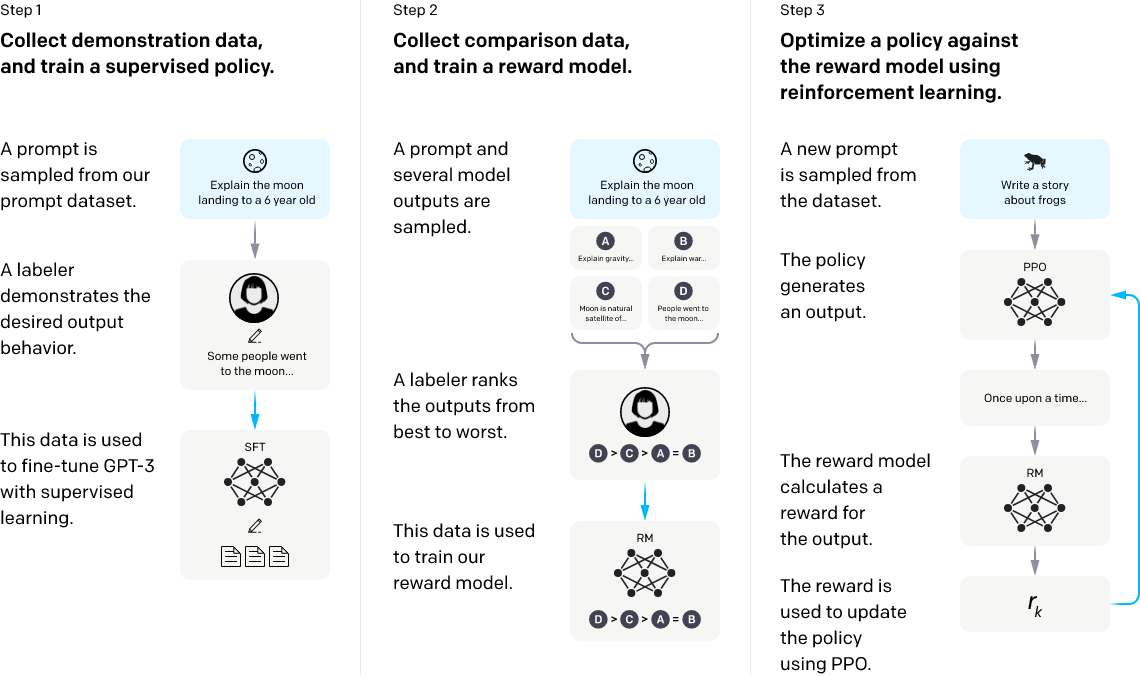

 При обучении ChatGPT также использовался метод обучения с подкреплением с обратной связью от человека. Отличия состоят в том, что ChatGPT была дообучена для задачи моделирования диалога.

## Классификация больших языковых моделей

Все существующие большие языковые модели можно разделить на три группы:
- <font color='F77FA2'> энкодерные</font>
- <font color='506ECC'>декодерные</font>
- <font color='67BF70'>энкодер-декодер</font>

<font color='A3A495'>Серым</font> обозначены модели, которые не имеют отношения к трансформерам.

Можно увидеть эволюцию по годам (снизу вверх). Цветом обозначены открытые модели, белым — доступные по подписке.

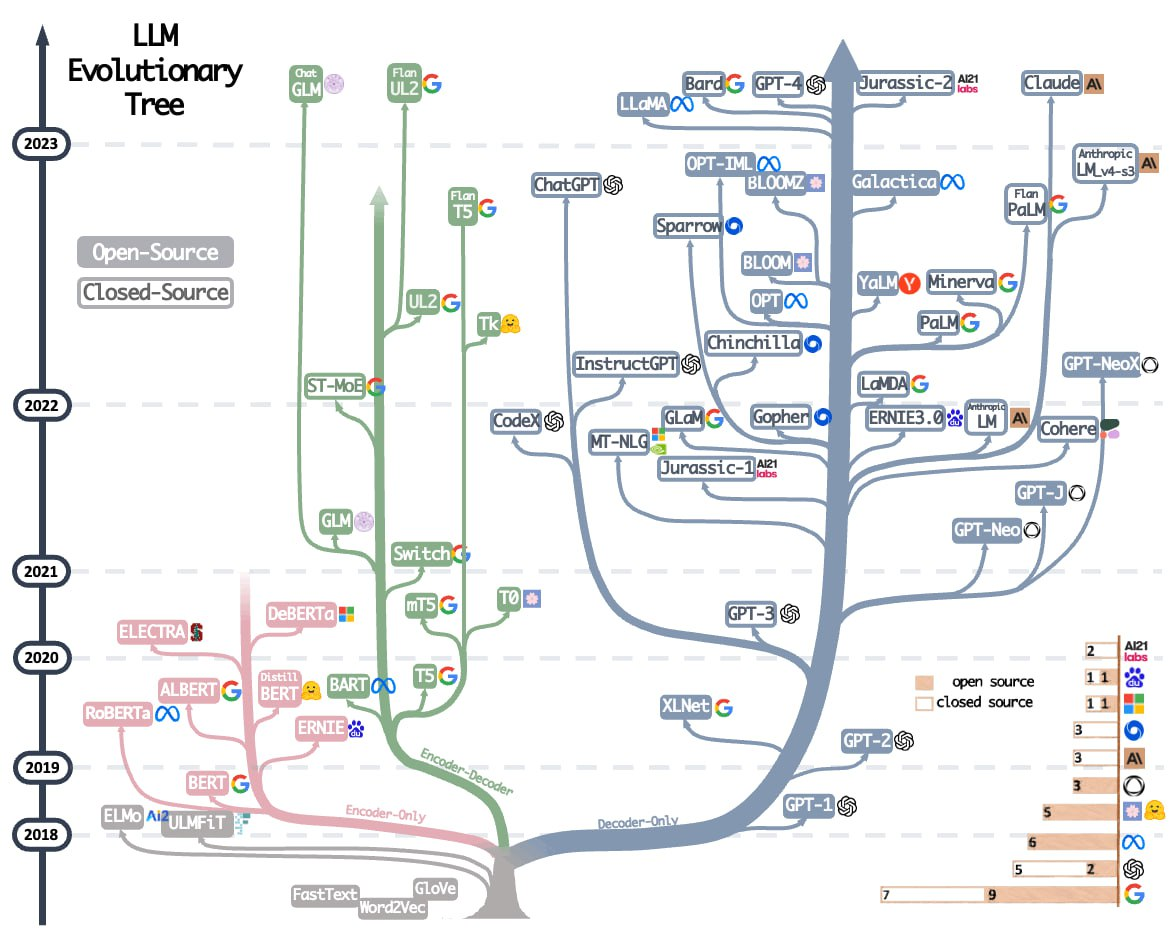

В начале развития больших языковых моделей были наиболее популярны энкодерные архитектуры, однако для их использования требуется дообучение на конкретной задаче. После появления GPT-3 интерес сместился в сторону декодерных моделей, поскольку их можно использовать для решения различных задач без дополнительного обучения.